# Departamento de Engenharia de Teleinformática
# Curso de Graduação em Engenharia de Telecomuniucações
# TI0077 - Inteligência Computacional Aplicada

## Homework 01 - Data Preprocessing

### Alunos:

- Ezequias Márcio Silva de Santana Júnior - 371887
- Ingrid Simões Moreira Furtado - 375147
- Yuri Sales Ribeiro - 375177

### Observações:
Para utilizar esse notebook é necessario ter Python3 instalado, juntamente com os pacotes listados abaixo:

- ```numpy 1.16.2```
- ```pandas 0.24.2```
- ```matplotlib 3.0.3```
- ```seaborn 0.9.0```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## O Conjunto de Dados

Necessário dar load nos dados originais; fazer as dummys e o tratamento de não nulos e dos tipos de variáveis...

o resultado do teste tem duas falhas diferentes..., 

utilizar um slice do dado full...ou seja pegar o '''dataset_hw01.xlsx''' do dado original e fazer ele ficar igual

#TODO: descrição do conjunto de amostras utilizado

https://www.kaggle.com/sachingawade/mos-classifier

https://link.springer.com/content/pdf/10.1007%2Fs41233-018-0019-8.pdf

https://link.springer.com/content/pdf/10.1007%2Fs41233-016-0002-1.pdf

https://www.oreilly.com/library/view/voip-voice-and/9780470227367/ch003-sec009.html

https://www.voipmechanic.com/mos-mean-opinion-score.htm


In [40]:
# Importing data:
# data = pd.read_excel('mos_dataset.xlsx')
data.head()

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,2017-07-01 00:00:27,-61.0,68.800003,1048.60,90.0,SUCCESS,UMTS,0.56,2.1
1,2017-07-01 00:02:57,-61.0,68.769997,1855.54,90.0,SUCCESS,UMTS,0.45,3.2
2,2017-07-01 00:05:29,-71.0,69.169998,1685.62,90.0,SUCCESS,UMTS,0.51,2.1
3,2017-07-01 00:08:02,-65.0,69.279999,1770.92,90.0,SUCCESS,UMTS,0.00,1.0
4,2017-07-01 00:10:30,-103.0,0.820000,256.07,60.0,SUCCESS,UMTS,3.35,3.6


In [49]:
# tratamento...
data.info()
data.describe(include='all') # retira os numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105828 entries, 0 to 105827
Data columns (total 9 columns):
Date Of Test                105828 non-null datetime64[ns]
Signal (dBm)                105821 non-null float64
Speed (m/s)                 105828 non-null float64
Distance from site (m)      95469 non-null float64
Call Test Duration (s)      105828 non-null float64
Call Test Result            105828 non-null object
Call Test Technology        105828 non-null object
Call Test Setup Time (s)    105828 non-null float64
MOS                         105828 non-null float64
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 7.3+ MB


,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
count,105828,105821.000000,105828.000000,95469.000000,105828.000000,105828,105828,105828.000000,105828.000000
unique,105393,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,2017-10-02 14:28:15,NaN,NaN,NaN,NaN,SUCCESS,UMTS,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,105148,72648,NaN,NaN
first,2017-07-01 00:00:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-10-31 23:50:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-78.653623,8.629296,7797.172461,84.202264,NaN,NaN,2.662776,3.105864
std,NaN,18.631699,18.008427,49584.213355,66.250741,NaN,NaN,2.057087,1.252348
min,NaN,-140.000000,-1.000000,1.410000,12.900000,NaN,NaN,0.000000,1.000000
25%,NaN,-92.000000,0.000000,236.580000,60.000000,NaN,NaN,0.640000,2.100000


In [37]:
np.sort(data.MOS.unique())

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4])

In [44]:
(data.MOS.value_counts())

4.4    31011
2.7    16228
1.0    15167
4.3    12528
2.1    12346
3.2     3221
3.3     1158
4.2     1078
2.6     1069
2.2      893
2.3      828
2.4      705
2.0      665
4.1      645
3.7      613
2.5      599
4.0      559
3.1      545
3.4      525
3.8      443
1.9      431
3.6      399
1.1      390
1.8      381
3.0      376
3.9      372
2.9      351
1.7      333
2.8      331
1.6      325
1.5      295
1.2      293
3.5      268
1.4      229
1.3      228
Name: MOS, dtype: int64

In [48]:
data.MOS.value_counts(bins=4)

(3.55, 4.4]      47648
(1.85, 2.7]      33764
(0.996, 1.85]    17641
(2.7, 3.55]       6775
Name: MOS, dtype: int64

# INICO

In [25]:
# após tratamento os dados devem estar assim +- :
datahw01 = pd.read_excel('dataset_hw01.xlsx') # Usando apenas 500 obs [3500:4000,:] 
datahw01.info()
print('\n',datahw01.columns)
print(f'\nDataset size: {datahw01.size}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Signal (dBm)                500 non-null int64
Speed (m/s)                 500 non-null float64
Distance from site (m)      500 non-null float64
Call Test Duration (s)      500 non-null float64
Call Test Result            500 non-null int64
Call Test Technology        500 non-null int64
Call Test Setup Time (s)    500 non-null float64
MOS                         500 non-null int64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB

 Index(['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)',
       'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology',
       'Call Test Setup Time (s)', 'MOS'],
      dtype='object')

Dataset size: 4000


In [26]:
datahw01.head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
3500,-85,0.00,254.62,90.0,1,2,0.61,4
3501,-85,0.00,254.04,90.0,1,2,0.59,4
3502,-85,0.00,253.78,90.0,1,2,0.67,4
3503,-83,5.76,138.87,60.0,1,1,3.58,3
3504,-85,0.00,253.65,90.0,1,2,0.64,4


In [26]:
datahw01.MOS.value_counts()

4    318
3     85
2     51
1     46
Name: MOS, dtype: int64

### Informações   RASCUNHO

 - Dados:
- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |

- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

## Unconditional mono-variate analysis

In [27]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
# unc_monovar.to_excel('hw01-results/hw01-data/unc_monovar.xlsx')
display(unc_monovar)

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-85.344000,18.775340,1818.475340,98.963120,0.972000,1.488000,1.054960
std $\sigma_d$,11.640131,25.887133,5640.907530,112.807773,0.165138,0.538922,1.562370
Skewness $\gamma_d$,-0.239259,1.115417,5.815732,6.770365,-5.739391,-0.337844,4.751219


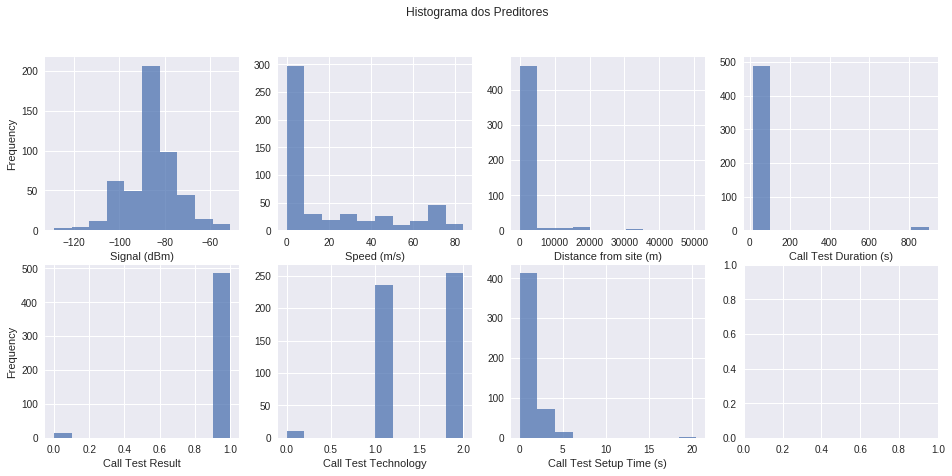

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(0, 7):
    ax[i].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)
#     plt.savefig('hw01-figs/hist_data.pdf')

## Class-conditional mono-variate analysis

In [7]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)']
print('Classe  | Quantidade')
for i in cls.indices:
    print(f'{classes[i-1]} |    {cls.get_group(i).iloc[:,1:].shape[0]}')

Classe  | Quantidade
Bad (1) |    46
Poor (2) |    51
Fair (3) |    85
Good (4) |    318


In [8]:
cls_monovar = []
for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-82.500000,46.269783,5573.748261,80.074130,0.847826,0.978261,0.778261
std $\sigma_{d|l_1}$,13.407709,27.047288,10939.394447,20.902077,0.363158,0.332608,3.117696
Skewness $\gamma_{d|l_1}$,-1.350906,-0.657397,3.016630,-2.057591,-2.002632,-0.426096,5.891166


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-80.529412,42.641961,7007.896667,194.246471,0.980392,0.901961,0.457059
std $\sigma_{d|l_2}$,10.819155,25.405307,11804.153100,274.036257,0.140028,0.300327,1.129484
Skewness $\gamma_{d|l_2}$,-1.350906,-0.657397,3.016630,-2.057591,-2.002632,-0.426096,5.891166


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-76.588235,21.996471,1097.757765,93.151529,0.988235,0.988235,2.088471
std $\sigma_{d|l_3}$,11.566880,25.370899,2196.631441,126.866421,0.108465,0.188611,1.798576
Skewness $\gamma_{d|l_3}$,-1.350906,-0.657397,3.016630,-2.057591,-2.002632,-0.426096,5.891166


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-88.867925,10.109497,635.638711,87.967610,0.984277,1.789308,0.914623
std $\sigma_{d|l_4}$,9.794490,19.980614,1386.640991,47.087916,0.124599,0.408443,1.014615
Skewness $\gamma_{d|l_4}$,-1.350906,-0.657397,3.016630,-2.057591,-2.002632,-0.426096,5.891166


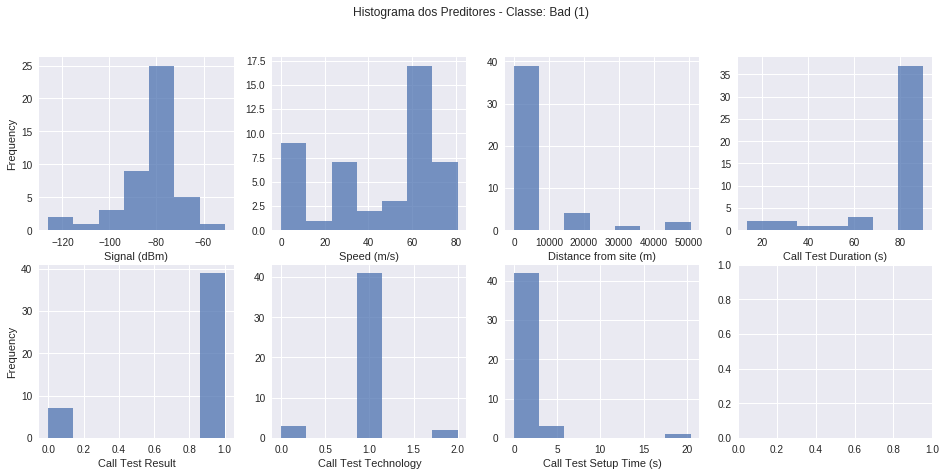

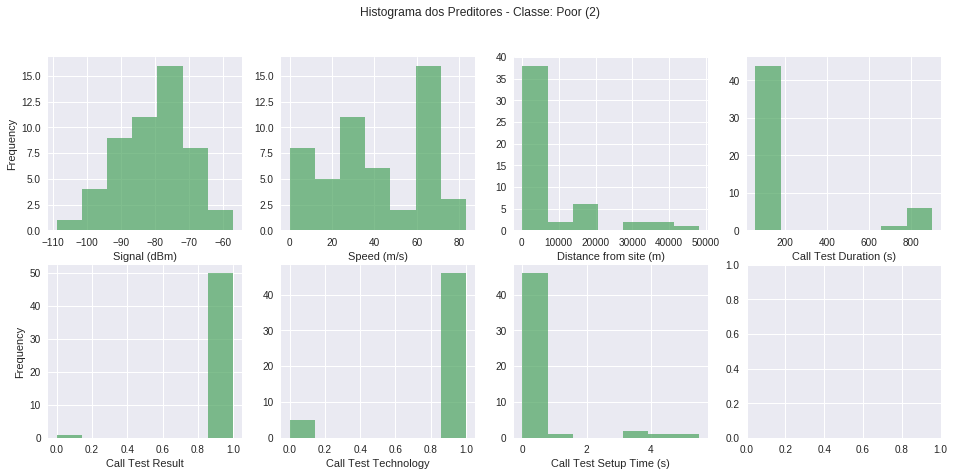

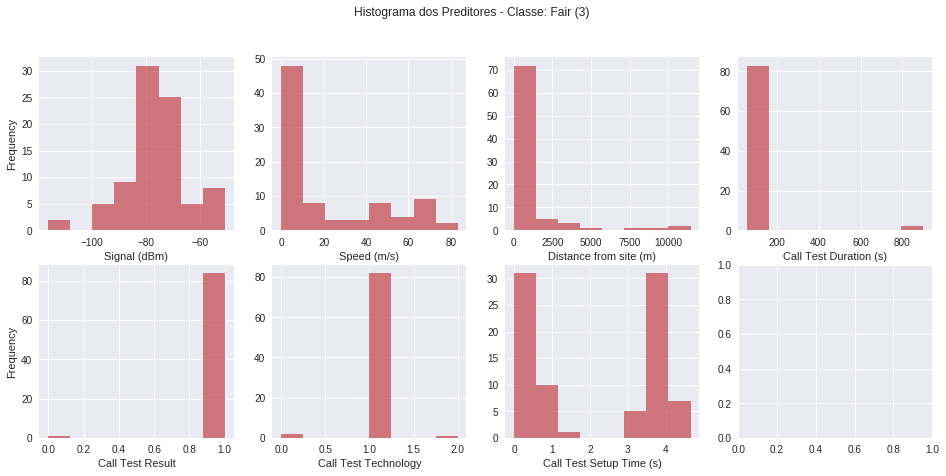

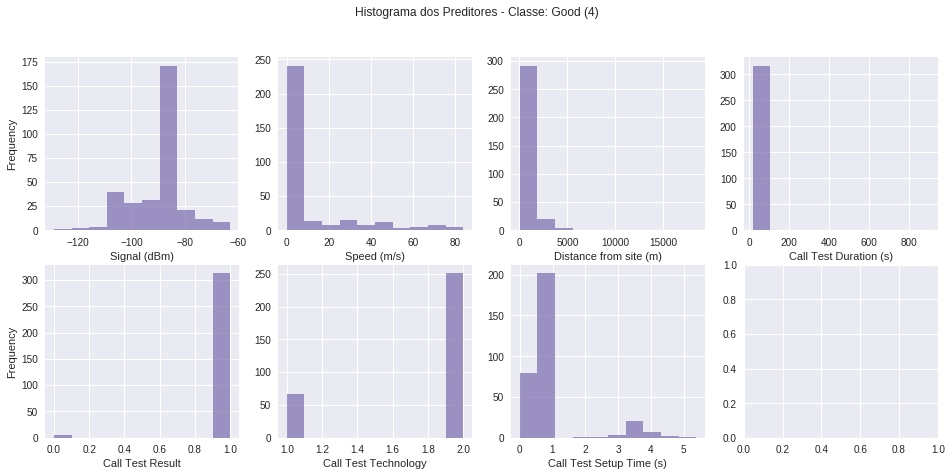

In [9]:
color=['C0','C1','C2','C3']
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[j-1]}')
    for i in range(0, 7):
        ax[i].set_xlabel(cls.get_group(j).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[j-1], alpha=.75)
#     plt.savefig(f'hw01-figs/hist_C{j}.pdf')

## Tranformações no dados

centering and scaling

In [10]:
scaled_datahw01 = datahw01.iloc[:,:-1]
scaled_datahw01 = (scaled_datahw01 - scaled_datahw01.mean())/scaled_datahw01.std()
scaled_datahw01.head()

# Apenas p/ visualização do normalizado
# fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
# ax = ax.ravel()
# fig.suptitle('Histograma dos Preditores')
# for i in range(0, 7):
#     ax[i].set_xlabel(scaled_datahw01.columns[i])
#     ax[0].set_ylabel('Frequency')
#     ax[4].set_ylabel('Frequency')
#     ax[i].hist(scaled_datahw01.iloc[:, i], bins='sturges', alpha=.75)

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
3500,0.029553,-0.725277,-0.277235,-0.079455,0.169555,0.950045,-0.284798
3501,0.029553,-0.725277,-0.277338,-0.079455,0.169555,0.950045,-0.297599
3502,0.029553,-0.725277,-0.277384,-0.079455,0.169555,0.950045,-0.246395
3503,0.201372,-0.502773,-0.297754,-0.345394,0.169555,-0.905511,1.616160
3504,0.029553,-0.725277,-0.277407,-0.079455,0.169555,0.950045,-0.265596


##  Unconditional bi-variate analysis

Matriz de Correlação e Scatter plot dos preditores

In [11]:
data_pair_corr = scaled_datahw01.corr()
data_pair_corr

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Signal (dBm),1.000000,0.052613,0.059475,-0.022853,0.250403,-0.345037,-0.011850
Speed (m/s),0.052613,1.000000,0.341599,0.046976,-0.199435,-0.407740,-0.244430
Distance from site (m),0.059475,0.341599,1.000000,0.121272,-0.007473,-0.265118,-0.150781
Call Test Duration (s),-0.022853,0.046976,0.121272,1.000000,-0.003806,-0.177652,-0.160464
Call Test Result,0.250403,-0.199435,-0.007473,-0.003806,1.000000,0.086288,-0.089949
Call Test Technology,-0.345037,-0.407740,-0.265118,-0.177652,0.086288,1.000000,-0.197427
Call Test Setup Time (s),-0.011850,-0.244430,-0.150781,-0.160464,-0.089949,-0.197427,1.000000


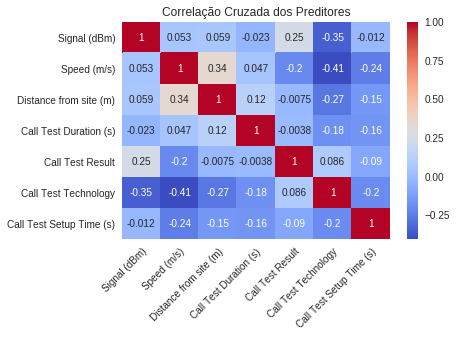

In [12]:
ax = sns.heatmap(data_pair_corr, annot=True, cmap='coolwarm')
ax.set_title('Correlação Cruzada dos Preditores')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig = ax.get_figure()
plt.show()
# fig.savefig('hw01-figs/data_corr.pdf', bbox_inches='tight')

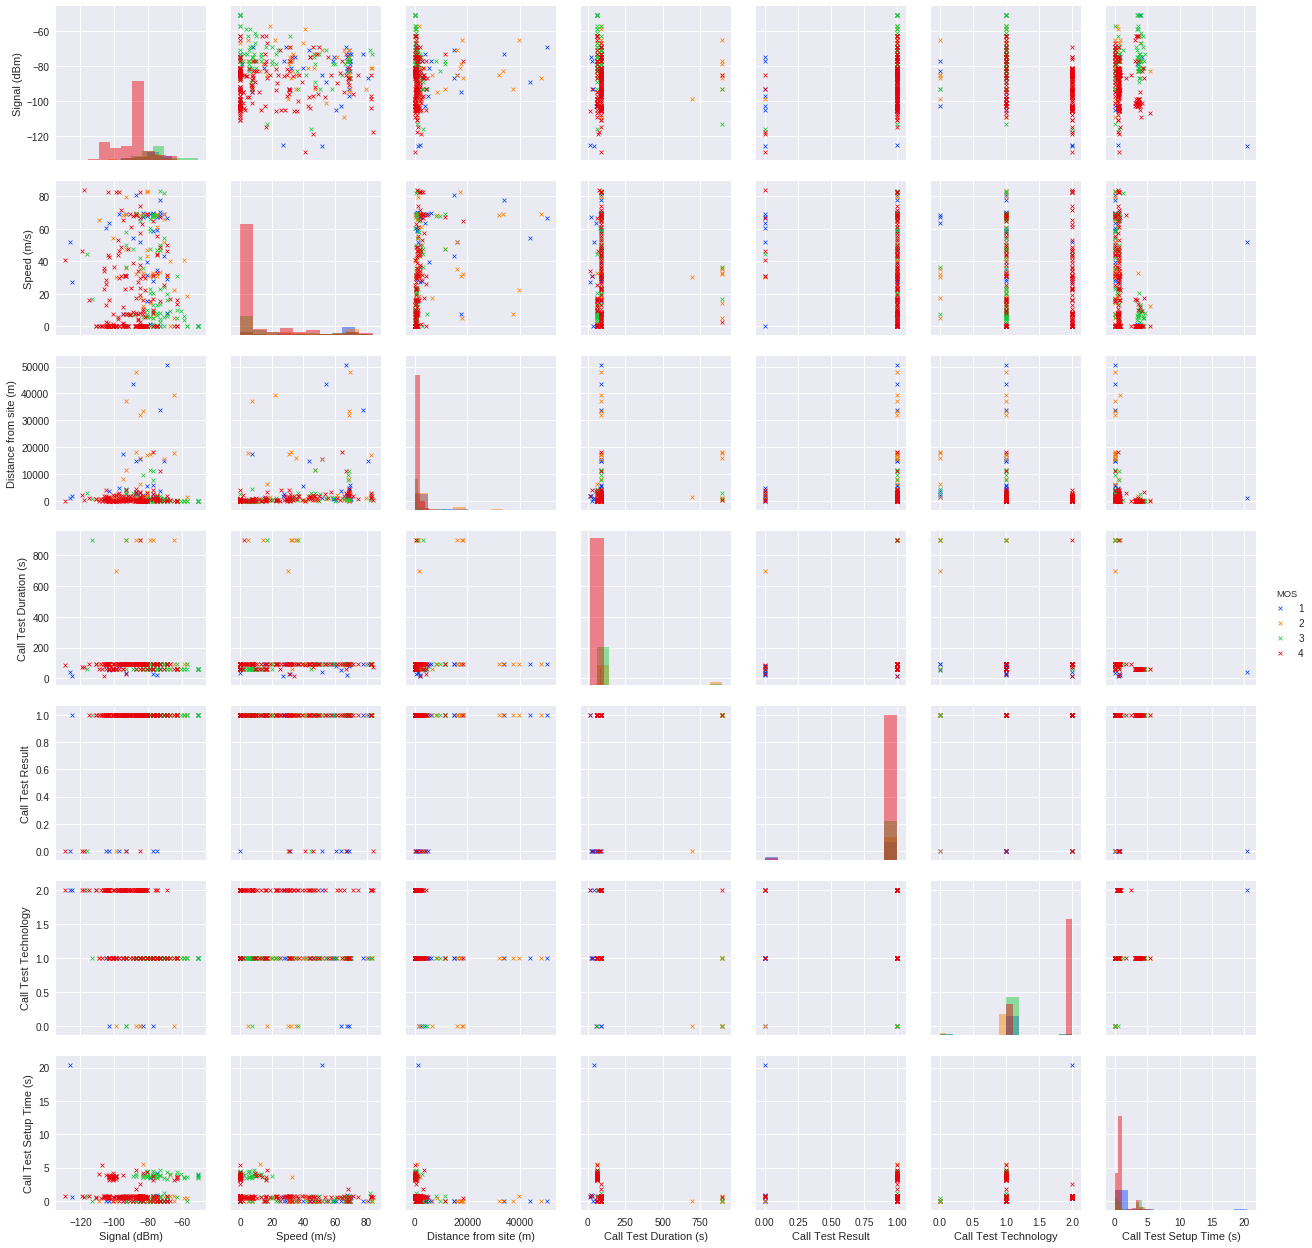

In [13]:
ax = sns.pairplot(datahw01, hue='MOS', palette='bright', vars=datahw01.columns[:-1], 
                  diag_kind='hist', plot_kws={"s": 15, "marker": 'x'}, diag_kws={"alpha": 0.45})
# ax.fig.savefig('hw01-figs/data_scatter.png', dpi=400)

## Q4 PCA Unconditional multi-variate analysis

usando ```scaled_datahw01```

Perform an unconditional multi-variate analysis of the predictors. Specifically, you
must perform a principal components analysis of the predictors, retain only the
first two principal components (those associated with the two largest eigenvalues)
and plot the scatter plot of the projected observations. Again, for each projected
point (observation) you must use colours or symbols to indicate the associated class
label. [Remember to perform the necessary pre-processing of the data]
Are the classes well (or better) separated? Are the boundaries between classes linear?
What classes show a high degree of overlap and thus are harder to separate?

In [27]:
# dado ja normalizado -> tira a COV
np.set_printoptions(4)
mt_cov = scaled_datahw01.cov().values
mt_cov

array([[ 1.    ,  0.0526,  0.0595, -0.0229,  0.2504, -0.345 , -0.0118],
       [ 0.0526,  1.    ,  0.3416,  0.047 , -0.1994, -0.4077, -0.2444],
       [ 0.0595,  0.3416,  1.    ,  0.1213, -0.0075, -0.2651, -0.1508],
       [-0.0229,  0.047 ,  0.1213,  1.    , -0.0038, -0.1777, -0.1605],
       [ 0.2504, -0.1994, -0.0075, -0.0038,  1.    ,  0.0863, -0.0899],
       [-0.345 , -0.4077, -0.2651, -0.1777,  0.0863,  1.    , -0.1974],
       [-0.0118, -0.2444, -0.1508, -0.1605, -0.0899, -0.1974,  1.    ]])

In [28]:
val, vec = np.linalg.eig(mt_cov)
val, vec
#TODO: Seleção dos dois maiores auto valores... indices...

(array([1.8445, 0.3198, 0.5588, 0.7593, 0.9638, 1.3149, 1.239 ]),
 array([[-0.259 , -0.2991, -0.4926,  0.3602, -0.113 , -0.6639, -0.1322],
        [-0.5572, -0.4916,  0.4809,  0.2218, -0.3221,  0.2466,  0.0529],
        [-0.4792, -0.0328, -0.3792, -0.7573, -0.137 ,  0.1224, -0.1349],
        [-0.2386, -0.2422, -0.0056,  0.0712,  0.8914,  0.1436, -0.2531],
        [ 0.0995, -0.0112,  0.5614, -0.3234, -0.0223, -0.5115, -0.555 ],
        [ 0.549 , -0.6475, -0.2189, -0.0723, -0.1668,  0.2954, -0.3334],
        [ 0.1569, -0.4357,  0.1381, -0.3642,  0.2043, -0.3374,  0.6916]]))

In [29]:
phi = np.stack([vec[:,0], vec[:,5]], axis=1)
print(phi)
# Aplicando transformação (progeção - produto escalar)
pc = scaled_datahw01.dot(phi)
pc.head()

[[-0.259  -0.6639]
 [-0.5572  0.2466]
 [-0.4792  0.1224]
 [-0.2386  0.1436]
 [ 0.0995 -0.5115]
 [ 0.549   0.2954]
 [ 0.1569 -0.3374]]


,0,1
3500,1.042053,0.046187
3501,1.040094,0.050494
3502,1.048148,0.033212
3503,0.226319,-1.243291
3504,1.045147,0.039688


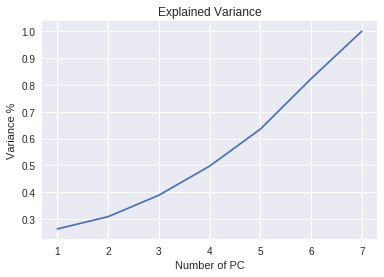

In [30]:
# Importância de cada pc
significance = np.cumsum(np.abs(val)/val.sum())
plt.figure()
plt.plot(np.arange(7)+1, significance)
plt.title('Explained Variance')
plt.xlabel('Number of PC')
plt.ylabel('Variance')
plt.show()

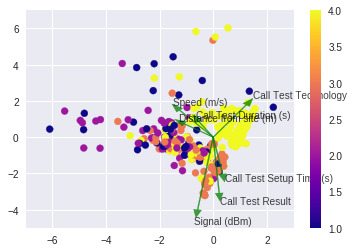

In [39]:
plt.figure()
plt.scatter(pc.iloc[:,0],pc.iloc[:,1], c=datahw01['MOS'], cmap='plasma')

for i in range(len(phi)):
    # arrows project features as vectors - PC axes
    plt.arrow(0, 0, phi[i, 0]*np.max(pc.iloc[:,0].values), 
                    phi[i, 1]*np.max(pc.iloc[:,1].values),
                    color='g', width=0.04, head_width=0.3, alpha=0.75)
    # text
    plt.text(phi[i,0]*np.max(pc.iloc[:,0])*1.2, 
             phi[i, 1]*max(pc.iloc[:,1])*1.2,
             datahw01.columns.values[i], color='k', alpha=0.75)
plt.axis([ -7, 3, -5,7])
plt.colorbar()
plt.show()
#plt.savefig('hw01-figs/pcaBiplot.pdf')